In [2]:
import tensorflow as tf  
from tensorflow import keras
import cv2
import numpy as np
from skimage.metrics import mean_squared_error as mse, peak_signal_noise_ratio as psnr
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()  # loads the popular "mnist" training dataset

x_train = x_train/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1
x_test = x_test/255.0

ModuleNotFoundError: No module named 'tensorflow'

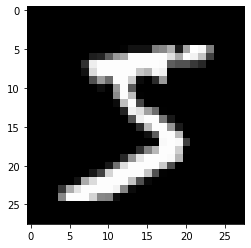

In [2]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="gray")

In [155]:
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
x2=keras.layers.Dense(500, activation="relu")(x)
x3=keras.layers.Dense(100, activation="relu")(x)
encoder_output = keras.layers.Dense(30, activation="relu")(x3)
encoder = keras.Model(encoder_input, encoder_output, name='encoder')
decoder_input = keras.layers.Dense(10, activation="relu")(encoder_output)
x21 = keras.layers.Dense(30, activation="relu")(decoder_input)
x22 = keras.layers.Dense(100, activation="relu")(x21)
x23 = keras.layers.Dense(500, activation="relu")(x22)
x = keras.layers.Dense(784, activation="relu")(x23)
decoder_output = keras.layers.Reshape((28, 28, 1))(x)
opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

In [156]:
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_22 (Flatten)        (None, 784)               0         
                                                                 
 dense_127 (Dense)           (None, 100)               78500     
                                                                 
 dense_128 (Dense)           (None, 30)                3030      
                                                                 
 dense_129 (Dense)           (None, 10)                310       
                                                                 
 dense_130 (Dense)           (None, 30)                330       
                                                                 
 dense_131 (Dense)           (None, 100)               

In [157]:
autoencoder.compile(opt, loss='mse')
epochs=10
for epoch in range(epochs):

    history = autoencoder.fit(
      x_train,
      x_train,
      epochs=1, 
      batch_size=32, validation_split=0.10
        )   
    autoencoder.save(f"models/AE-{epoch+1}.model")

1688/1688 [==============================] - 10s 5ms/step - loss: 0.0315 - val_loss: 0.0236
INFO:tensorflow:Assets written to: models/AE-1.model/assets
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0222 - val_loss: 0.0209
INFO:tensorflow:Assets written to: models/AE-2.model/assets
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0203 - val_loss: 0.0195
INFO:tensorflow:Assets written to: models/AE-3.model/assets
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0193 - val_loss: 0.0189
INFO:tensorflow:Assets written to: models/AE-4.model/assets
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0186 - val_loss: 0.0186
INFO:tensorflow:Assets written to: models/AE-5.model/assets
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0182 - val_loss: 0.0183
INFO:tensorflow:Assets written to: models/AE-6.model/assets
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0178 - val_loss: 0.0180


In [152]:
example = encoder.predict([ x_test[2].reshape(-1, 28, 28, 1) ])

In [147]:
example.shape


(1, 10)

9.631402983361836


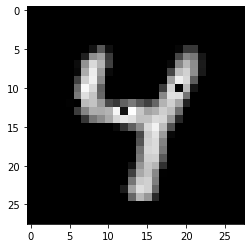

In [160]:
ae_out = autoencoder.predict([ x_test[6].reshape(-1, 28, 28, 1) ])
img = ae_out[0]  # predict is done on a vector, and returns a vector, even if its just 1 element, so we still need to grab the 0th
print(psnr(np.rint(ae_out[0]*255).astype('uint8'),np.rint(255*x_test[7].reshape( 28, 28, 1)).astype('uint8')))
plt.imshow(np.rint(ae_out[0]*255).astype('uint8'), cmap="gray")

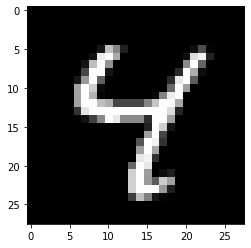

In [161]:
plt.imshow(x_test[6], cmap="gray")